***CHARMI YASHWANT KANANI***

***GO_STP_755***

### Practice KNN - We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not. 



In [ ]:
import pyforest

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/User_Data.csv')
del df['User ID']
df.head()

<IPython.core.display.Javascript object>

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.shape

(400, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
df[['Age', 'EstimatedSalary']].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
df['Purchased'].value_counts(normalize = True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

<IPython.core.display.Javascript object>

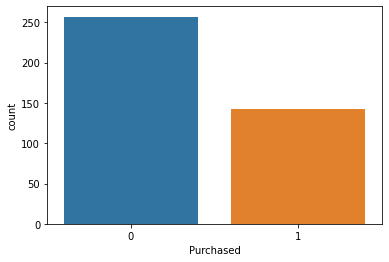

In [ ]:
sns.countplot(df['Purchased'])

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<IPython.core.display.Javascript object>

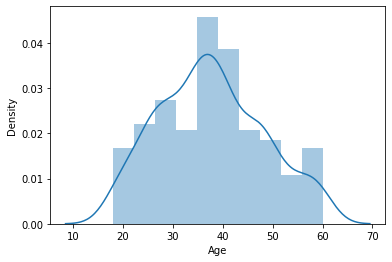

In [ ]:
sns.distplot(df['Age'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

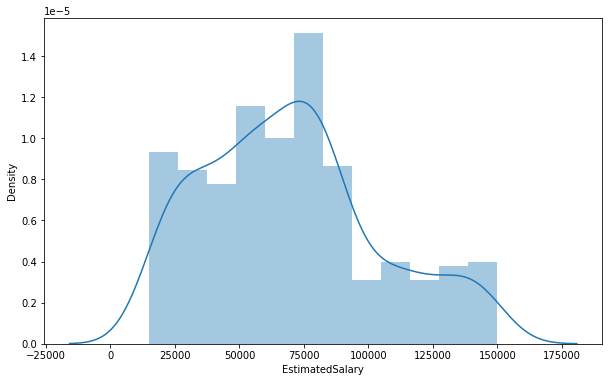

In [ ]:
plt.figure(figsize = (10,6)) 
sns.distplot(df['EstimatedSalary'])

<IPython.core.display.Javascript object>

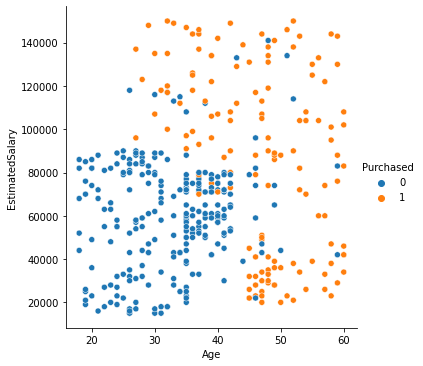

In [ ]:
sns.relplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = df)

<IPython.core.display.Javascript object>

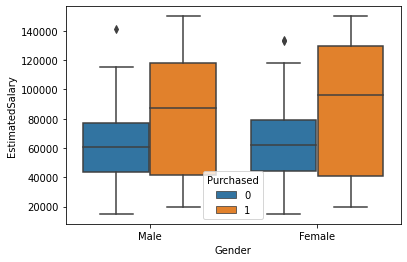

In [ ]:
sns.boxplot(x = 'Gender', y = 'EstimatedSalary', hue = 'Purchased', data = df)

In [ ]:
var = pd.get_dummies(df['Gender'], drop_first = True)
df = df.join(var) 
df.drop('Gender', axis = 1, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

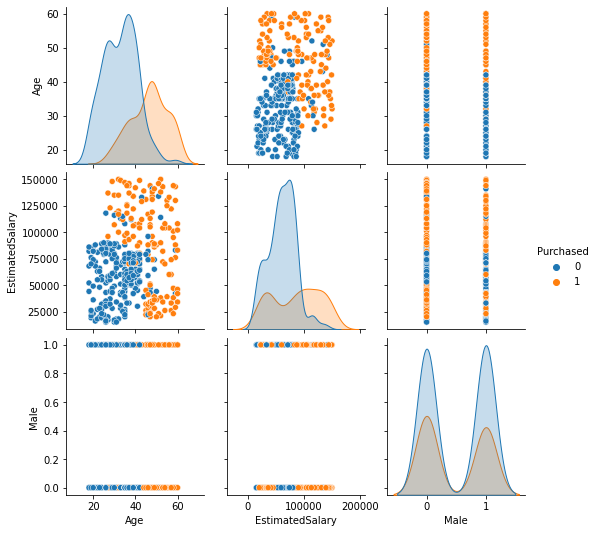

In [ ]:
sns.pairplot(df, hue = 'Purchased')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

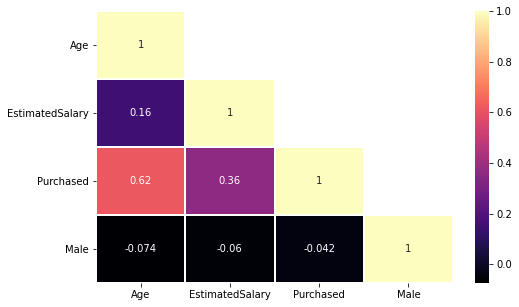

In [ ]:
plt.figure(figsize = (8,5)) 
cor = df.corr()
np.tril(np.ones(cor.shape)).astype(np.bool)
Lower_M = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(Lower_M,cmap = 'magma', linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [ ]:
X = df.drop(['Purchased'], axis = 1)
y = df['Purchased']

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<IPython.core.display.Javascript object>

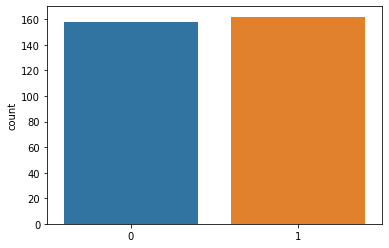

In [ ]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state = 42)
X1, y1 = sme.fit_resample(X, y)
sns.countplot(y1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  6],
       [ 0, 47]])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9375
